# 1.2.1 Getting Started with Images

In [1]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
resource_path = os.getcwd() + "/resource/"

In [3]:
img = cv2.imread(resource_path + "messi.jpg", 0)

In [4]:
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', img)
k = cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite(resource_path + "new_messi.jpg", img)
    cv2.destroyAllWindows()

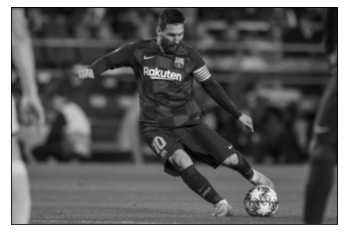

In [6]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

# 1.2.2 Getting Started with Videos

In [1]:
import numpy as np
import cv2
import os

In [2]:
resource_path = os.getcwd() + "/resource/"

In [3]:
cap = cv2.VideoCapture(resource_path + "tracking1.avi")
fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = cap.get(cv2.CAP_PROP_FPS)
w = int(cap.get(3))
h = int(cap.get(4))
out = cv2.VideoWriter(resource_path + 'output.avi', fourcc, fps, (w, h))

In [4]:
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(gray)
        cv2.imshow('frame', gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

# 1.2.3 Drawing Functions in OpenCV

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = np.zeros((512, 512, 3), np.uint8)
img = cv2.line(img, (0,0), (511, 511), (255, 0, 0), 5)
img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)
img = cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)
img = cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)

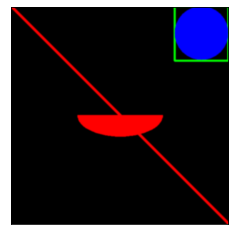

In [3]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
img = cv2.polylines(img, [pts], True, (0, 255, 255))
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),8,cv2.LINE_AA)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

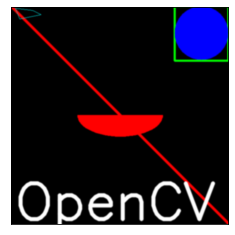

In [5]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

# 1.2.4 Mouse as a Paint-Brush

In [1]:
import cv2
import numpy as np

In [2]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [3]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)

In [4]:
# img = np.zeros((512, 512, 3), np.uint8)
# cv2.namedWindow('image')
# cv2.setMouseCallback('image', draw_func)

# while(1):
#     cv2.imshow('image', img)
#     if cv2.waitKey(20) & 0xFF == 27:
#         break

# cv2.destroyAllWindows()

In [5]:
drawing = False
mode = True
ix, iy = -1, -1

In [6]:
def draw_func(event, x, y, flags, param):
    global ix, iy, drawing, mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
                
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

In [7]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_func)

In [8]:
while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

# 1.2.5 Trackbar as the Color Palette

In [1]:
import cv2
import numpy as np

In [2]:
def nothing(x):
    pass

In [3]:
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

In [4]:
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

In [5]:
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

In [6]:
while(1):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
        
cv2.destroyAllWindows()